In [40]:
from qiskit import QuantumCircuit, transpile
import random
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
from qiskit.circuit import Parameter

### Step 1: Map the problem to circuits and operators

In [41]:
def create_bell_pair(qc, a, b):
  qc.h(a)
  qc.cx(a, b)

In [42]:
def encode_message(qc, qubit, message):
  if ((message[0] != 0 | message[0] != 1) & (message[1] != 0 | message[1] != 1)):
    print("Invalid message")
    return
    
  if (message[1] == 1):
    qc.z(qubit)

  if (message[0] == 1):
    qc.x(qubit)

In [43]:
def decode(qc, a, b):
  qc.cx(a, b)
  qc.h(a)

### Primary Circuit

In [45]:
qc = QuantumCircuit(3, 2)
create_bell_pair(qc, 1, 2)

In [46]:
### Modify Qubit 0 to arbitrary state
# qc.x(0)

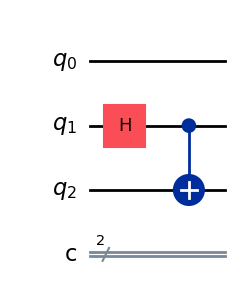

In [47]:
qc.draw(output='mpl')

In [48]:
decode(qc, 0, 1)

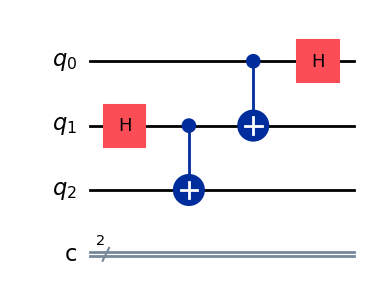

In [49]:
qc.draw(output='mpl')

In [50]:
qc.measure([0, 1], [0, 1])

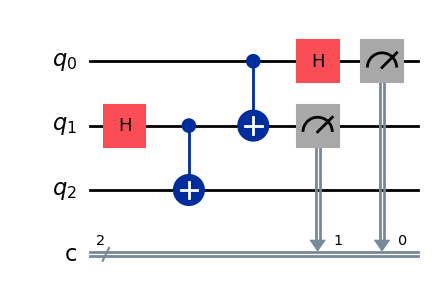

In [51]:
qc.draw(output='mpl')

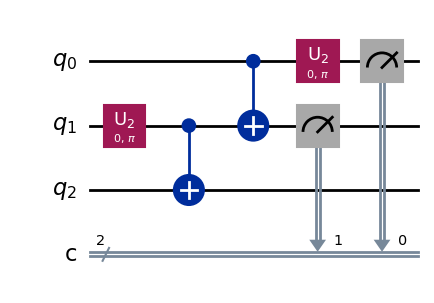

In [52]:
qc.decompose().draw(output='mpl')

In [53]:
# Step 1: Define parameters
theta = Parameter('θ')
phi = Parameter('φ')

In [62]:
qc_parameterized = QuantumCircuit(1)

# Step 2: Apply rotation gates to prepare the arbitrary state
qc_parameterized.rx(theta, 0)
qc_parameterized.rz(phi, 0)

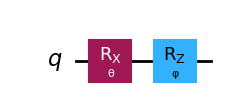

In [63]:
qc_parameterized.draw(output='mpl')

In [64]:
qc_parameterized.to_instruction()

Instruction(name='circuit-179', num_qubits=1, num_clbits=0, params=[Parameter(θ), Parameter(φ)])

In [59]:

# with circuit.switch(c_registers) as case:
#     with case(0, 0):
#     with case (0, 1):
#         circuit.x(0)
#     with case (1, 0):
#         circuit.z(0)
#     with case (1, 1):
#         circuit.z(0)
#         circuit.x(0)

IndentationError: expected an indented block after 'with' statement on line 2 (3201288646.py, line 3)

### Step 2: Optimize the circuit

### Step 3: Run the circuit on a backend

In [18]:
from qiskit_aer import AerSimulator

# Create an instance of the AerSimulator backend
simulator = AerSimulator()

# Run the circuit on the backend and get the result
result = simulator.run(qc).result()

# Get the counts of the measurements
counts = result.get_counts()

# Print the cbit values
print(counts)

{'01': 250, '10': 259, '00': 253, '11': 262}


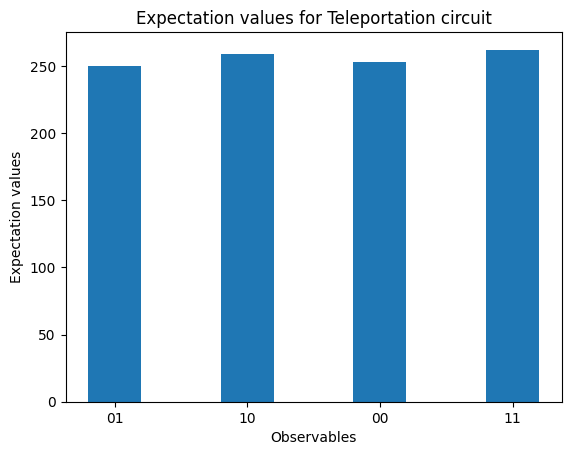

In [19]:
data = counts.keys()
values = counts.values()

plt.bar(data, values, width=0.4)
plt.xlabel('Observables')
plt.ylabel('Expectation values')
plt.title('Expectation values for Teleportation circuit')
plt.show()